In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(12, 7.5))

<Figure size 864x540 with 0 Axes>

<Figure size 864x540 with 0 Axes>

In [2]:
candidate_news_file = "data/news_new_with_time.tsv"
bias_detection_path = "data/0929_concat_mind_over_res.csv"
train_news_path = "../infer/mind/news/train_news.tsv"
valid_news_path = "../infer/mind/news/valid_news.tsv"
test_news_path = "../infer/mind/large_test/news.tsv"

In [3]:
nid2title = dict()
nid2abstract = dict()
news_path_list = [train_news_path, valid_news_path, test_news_path]
for file_path in news_path_list:
    with open(file_path, "r") as f:
        for line in f:
            line_split = line.rstrip("\n").split("\t")
            nid2title[line_split[0]] = line_split[3]
            nid2abstract[line_split[0]] = line_split[4]

In [4]:
bias_detection_df = pd.read_csv(bias_detection_path, header=None, sep="\t")
bias_detection_df.columns = ['nid', 'category', 'sub_category', 'bias_prob']
bias_detection_df.head()

,nid,category,sub_category,bias_prob
0,N86255,health,medical,0.006061
1,N75236,health,voices,0.249384
2,N93187,news,newsworld,0.257587
3,N99744,health,medical,0.188748
4,N45436,news,newsscienceandtechnology,0.061762


In [5]:
bias_detection_df["title"] = bias_detection_df["nid"].apply(lambda x: nid2title[x])
bias_detection_df["abstract"] = bias_detection_df["nid"].apply(lambda x: nid2abstract[x])

(-0.5, 399.5, 199.5, -0.5)

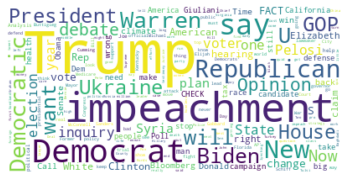

In [6]:

text_list = []
bias_news_df = bias_detection_df[(bias_detection_df["bias_prob"] >= 0.5) & (bias_detection_df["category"] == "news")]
title_list = bias_news_df["title"].tolist()
for title in title_list:
    for val in title.split():
        text_list.append(val)
text = " ".join(text_list)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off") 
plt.savefig("pdf/wordcloud_news_category.pdf")

(-0.5, 399.5, 199.5, -0.5)

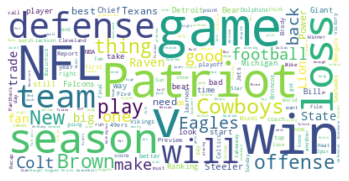

In [7]:

text_list = []
bias_news_df = bias_detection_df[(bias_detection_df["bias_prob"] >= 0.5) & (bias_detection_df["category"] == "sports")]
title_list = bias_news_df["title"].tolist()
for title in title_list:
    for val in title.split():
        text_list.append(val)
text = " ".join(text_list)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off") 
plt.savefig("pdf/wordcloud_sports_category.pdf")

In [4]:
# nid2bias_prob = dict(zip(bias_detection_df["nid"], bias_detection_df["bias_prob"]))

In [8]:
bias_detection_df['category'].value_counts()

sports           40633
news             37484
finance           7199
travel            6104
foodanddrink      5216
lifestyle         5178
weather           4857
autos             3543
health            3490
video             3255
music             1608
tv                1582
movies             956
entertainment      909
kids               120
middleeast           2
games                1
Name: category, dtype: int64

In [9]:
category_grouped = bias_detection_df.groupby("category")



In [11]:
total_bias = 0
total_unbias = 0
category2num = dict()
category2bias = dict()
category2unbias = dict()
category2prob = dict()
title_list = []
abstract_list = []
for category, grouped in category_grouped:
#     if category not in ["middleeast", "games"]:
    num_bias = 0
    num_unbias = 0
    val_list = grouped["bias_prob"].tolist()
    for val in val_list:
        if val >= 0.5:
            num_bias += 1
        else:
            num_unbias += 1
    print(category, num_bias + num_unbias, num_bias, num_unbias, num_bias/(num_bias+num_unbias))
    category2num[category] = num_bias + num_unbias
    category2bias[category] = num_bias
    category2unbias[category] = num_unbias
    category2prob[category] = num_bias / (num_bias + num_unbias)
    total_bias += num_bias
    total_unbias += num_unbias

print(total_bias, total_unbias, total_bias / (total_bias + total_unbias))

autos 3543 331 3212 0.09342365227208581
entertainment 909 89 820 0.09790979097909791
finance 7199 829 6370 0.11515488262258647
foodanddrink 5216 648 4568 0.12423312883435583
games 1 0 1 0.0
health 3490 527 2963 0.1510028653295129
kids 120 10 110 0.08333333333333333
lifestyle 5178 611 4567 0.11799922750096563
middleeast 2 0 2 0.0
movies 956 27 929 0.028242677824267783
music 1608 36 1572 0.022388059701492536
news 37484 1913 35571 0.05103510831288016
sports 40633 5316 35317 0.1308296212438166
travel 6104 107 5997 0.01752948885976409
tv 1582 58 1524 0.03666245259165613
video 3255 301 2954 0.09247311827956989
weather 4857 43 4814 0.008853201564751905
10846 111291 0.08880191915635721


In [12]:
category2num = {k: v for k, v in sorted(category2num.items(), key=lambda item: item[1], reverse=True)}

In [41]:
1/1.6

0.625

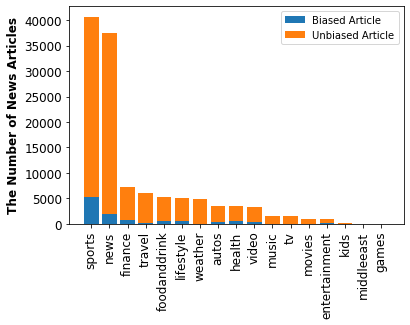

In [14]:
category_list = list(category2num.keys())
bias_list = [category2bias[category] for category, num in category2num.items()]
unbias_list = [category2unbias[category] for category, num in category2num.items()]
prob_list = [category2prob[category] for category, num in category2num.items()]
plt.bar(x=category_list, height=bias_list, label="Biased Article")
plt.bar(x=category_list, height=unbias_list, bottom=bias_list, label="Unbiased Article")
plt.legend()
plt.ylabel("The Number of News Articles", fontweight='bold', fontsize=12)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("pdf/stat_category_in_mind.pdf", format="pdf", bbox_inches="tight")

